In [11]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
homedir=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S106d18May17_635_CuAzu655_longtime';#data directory
print('The working directory is parentdir: %s' %parentdir)
print('The data directory is homedir: %s' %homedir)

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis
The data directory is homedir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S106d18May17_635_CuAzu655_longtime


In [12]:
#Run this once to run the .py file.
os.chdir(parentdir)
!python Analysis_bis.py
%run Analysis_bis.py
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [13]:
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "14"

In [4]:
pd.set_option('display.max_columns', 500)

## List of points

In [5]:
point_list(foldername=homedir)

Point number in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly placed(found): 
potential value in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly defined


,Point_1,Point_2,Point_3,Point_6,Point_7,Point_8,Point_9,Point_10,Point_11,Point_12,Point_13,Point_14,Point_15,Point_17,Point_18,Point_19,Point_20,Point_21,Point_22,Point_23,Point_24,Point_25,Point_26,Point_27,Point_28
0,25.0,25.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,75.0,75.0,75.0,75.0,75.0,75.0,50.0,50.0,50.0,50.0,50.0,100.0,100.0,100.0,100.0,100.0


# Time trace analysis

## Time trace plot

Point number in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly placed(found): 
potential value in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly defined


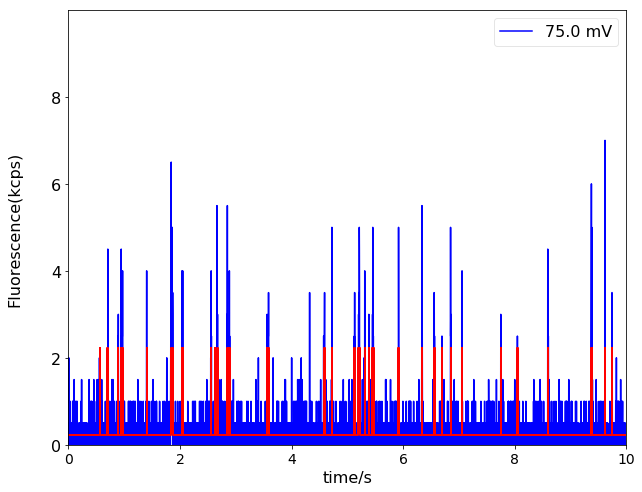

In [9]:
fig = time_trace_plot(foldername= homedir, input_potential=[75], pointnumbers=[13],
                      x_lim_min=0, y_lim_min=0, x_lim_max=10, y_lim_max=10, bin=2, show_changepoint=True)

## On-off histogram: 1D

### 100 mV

#### Point_26: 1600 s

Point number in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly placed(found): 
potential value in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly defined


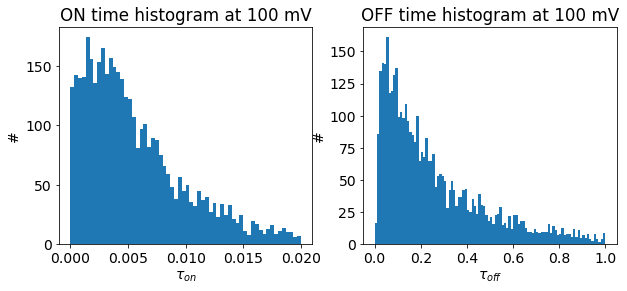

In [18]:
homedir=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S106d18May17_635_CuAzu655_longtime';#data directory
t_ons, t_offs = histogram_on_off_1mol(foldername= homedir, input_potential=[100], pointnumbers=[26], bins_on=60, range_on=[0, 0.02], bins_off=100, range_off=[0, 1], plotting=True)

### 75 mV

#### Point_13: 360 s

Point number in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly placed(found): 
potential value in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly defined


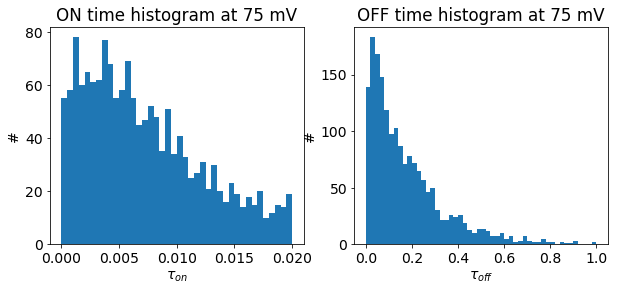

In [11]:
t_ons, t_offs = histogram_on_off_1mol(foldername= homedir, input_potential=[75], pointnumbers=[13], bins_on=40, range_on=[0, 0.02], bins_off=50, range_off=[0, 1], plotting=True)

## On-off histgram:2D

### 100 mV

#### Point_26:1600 s

Point number in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly placed(found): 
potential value in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly defined
Number of on events: 4170
Number of off events: 4168


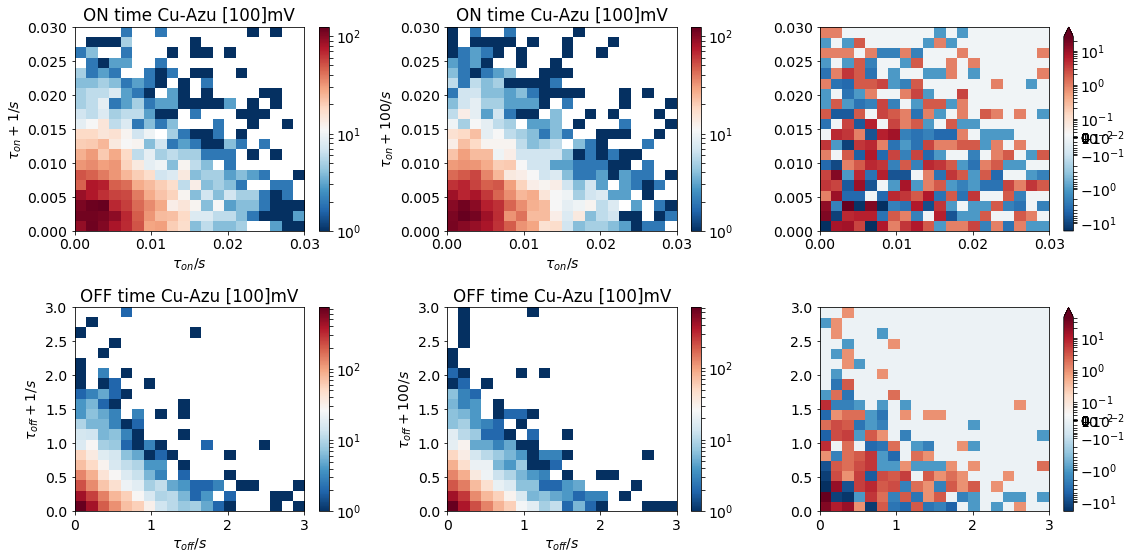

In [20]:
C_on_diff, C_off_diff = hist2D_on_off(foldername=homedir, input_potential=[100], pointnumbers=[26], bins_on=20, range_on=[0, 0.03], bins_off=20, range_off=[0, 3], x_shift=100, plots=True)

#### all molecules

Number of on events: 6938
Number of off events: 6928


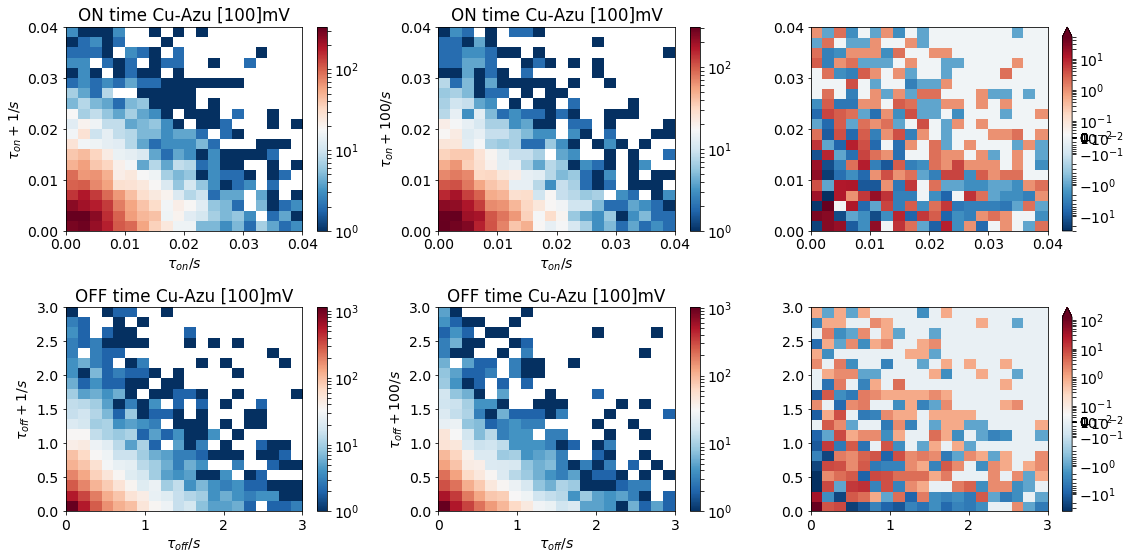

In [22]:
folder_100mV = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S106d18May17_635_CuAzu655_longtime/S106d18May17_60.5_635_A9_CuAzu655_100mV(18)';
C_on_diff, C_off_diff = hist2D_on_off(foldername=folder_100mV, input_potential=[100], pointnumbers=range(50), bins_on=20, range_on=[0, 0.04], bins_off=20, range_off=[0, 3], x_shift=100, plots=True)

In [74]:
def hist2D_on_off(foldername=foldername, input_potential=[100], pointnumbers=[24], bins_on=40, range_on=[0, 0.01], bins_off=50, range_off=[0, 1], x_shift=10, plots=True):
    t_ons = []; t_offs=[];
    for i in pointnumbers:
        t_on_temp, t_off_temp = histogram_on_off_1mol(foldername= foldername, input_potential=input_potential, pointnumbers=[i], plotting=False)
        t_ons = np.concatenate((t_ons, t_on_temp), axis=0)
        t_offs = np.concatenate((t_offs, t_off_temp), axis=0)

    t_ons=pd.Series(t_ons);t_offs=pd.Series(t_offs)
    t_on_shifted_1 = t_ons.shift(+1) ## shift up
    t_on_delay_1 = pd.DataFrame([t_on_shifted_1, t_ons]); t_on_delay_1=t_on_delay_1.T
    t_on_delay_1 = t_on_delay_1.dropna();
    t_off_shifted_1 = t_offs.shift(+1) ## shift up

    t_on_shifted_x = t_ons.shift(+x_shift) ## shift up
    t_off_shifted_x = t_offs.shift(+x_shift) ## shift up
    print('Number of on events: %d' %len(t_ons))
    print('Number of off events: %d' %len(t_offs))
    if plots==True:
        import matplotlib as mpl
        colormap=mpl.cm.RdBu_r
        fig = plt.figure(figsize=(16,8))

        ax2 = fig.add_subplot(1,2,1)#2,2,1
        C_on_x,Ex_on_x,Ey_on_x, figu = hist2d(t_on_shifted_x[x_shift:], t_ons[x_shift:], range=[range_on, range_on], bins=bins_on, norm=mpl.colors.LogNorm(), cmap=colormap)
        Ex_on_x,Ey_on_x = meshgrid(Ex_on_x,Ey_on_x)
        #ax2.pcolormesh(Ex_on_x, Ey_on_x, C_on_x, cmap=colormap)#,norm=mpl.colors.LogNorm()
        colorbar()
        ax2.set_title('ON time Cu-Azu %smV' %input_potential)
        ax2.set_xlabel(r'$\tau_{on}/s$')
        ax2.set_ylabel(r'$\tau_{on}+%s/s$'%x_shift)

        ax5 = fig.add_subplot(1,2,2)
        C_off_x,Ex_off_x,Ey_off_x, figu = hist2d(t_off_shifted_x[x_shift:], t_offs[x_shift:], range=[range_off, range_off],bins=bins_off, norm=mpl.colors.LogNorm(), cmap=colormap);#, norm=mpl.colors.LogNorm()
        Ex_off_x,Ey_off_x = meshgrid(Ex_off_x,Ey_off_x)
        colorbar()
        ax5.set_title('OFF time Cu-Azu %smV' %input_potential)
        ax5.set_xlabel(r'$\tau_{off}/s$')
        ax5.set_ylabel(r'$\tau_{off}+%s/s$'%x_shift)

        plt.tight_layout()
    return(t_ons, t_offs)

In [ ]:
homedir=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S106d18May17_635_CuAzu655_longtime'
shift_list=linspace(10, 1000, (1000/10))
tempfolder=r'/home/biswajit/Downloads/temp'
files = []
for i in shift_list:
    C_on_diff, C_off_diff = hist2D_on_off(foldername=homedir, input_potential=[100],\
                                          pointnumbers=[26], bins_on=20,\
                                          range_on=[0, 0.03], bins_off=20,\
                                          range_off=[0, 3], x_shift=int(i), plots=True)
    fname = '_tmp%03d.png' % i
    os.chdir(tempfolder)
    savefig(fname)
    files.append(fname)
    plt.close()
print('Making movie animation.mpg - this make take a while')
os.chdir(tempfolder)
os.system("mencoder 'mf://_tmp*.png' -mf type=png:fps=10 -ovc lavc -lavcopts vcodec=wmv2 -oac copy -o animation.mpg")
for fname in files:
    os.remove(fname)

In [67]:
convert -quality 100 *.png outvideo.mpeg

SyntaxError: invalid syntax (<ipython-input-67-e6d11ee93b08>, line 1)

# FCS Analysis

Point number in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly placed(found): 
potential value in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly defined
A is 1.185 
t_ac is 13.163


(24.27507303732181, 28.754392812182211, 0.84422137500456373)

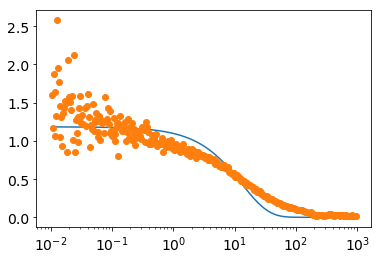

In [48]:
df_datn_em_specific, df_fcs_specific = get_point_specifics(foldername= homedir, input_potential=[0], pointnumbers=[8])
df_fcs=df_fcs_specific['filepath[FCS]'][0]
df_emplot = df_datn_em_specific['filepath[.em.plot]'][0]
df_datn = df_datn_em_specific['filepath[.datn]'][0]
def FCS_mono_fit(df_fcs,df_emplot, tmin=0.01,tmax=1000):
    df_fcs = pd.read_csv(df_fcs, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
    df_fcs = df_fcs[df_fcs[0]>=tmin];
    df_fcs = df_fcs[df_fcs[0]<=tmax];
    xdata=df_fcs[0];
    ydata=df_fcs[1];
    df_em = pd.read_csv(df_emplot, header=None, sep='\t')#changepoint
    S=max(df_em[1]);
    Bkr=min(df_em[1]);
    correction_BG = (S/(S+Bkr))**2
    ydata= ((ydata)/correction_BG)
    def mono_exp(x, A, t_ac):
        return (A*exp(-x/t_ac))
    monofit, pcov = curve_fit(mono_exp, xdata, ydata, p0 = [1, 1], bounds=(0, np.inf))
    plot(xdata, mono_exp(xdata, *monofit))
    plot(xdata, ydata, 'o')
    xscale('log')
    A=monofit[0]; t_ac = monofit[1];
    print('A is %.3f \nt_ac is %.3f' %(A, t_ac))
    toff = t_ac*(1+A); ton = t_ac*(1+(1/A));
    tratio_on_off = ton/toff
    return(ton, toff, tratio_on_off, monofit)#, t_on_err, t_off_err
ton, toff, tratio_on_off, monofit = FCS_mono_fit(df_fcs, df_emplot)
ton, toff, tratio_on_off

## 100 mV